In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [41]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [42]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are no any null data in the dataset.

In [44]:
df.duplicated().sum()

0

There are no any duplicates.

In [32]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

We can see that 7963 have left the bank and 2037 people are staying.

In [45]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [46]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], inplace = True)

In [47]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### One hot encoding

In [53]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

KeyError: "None of [Index(['Geography', 'Gender'], dtype='object')] are in the [columns]"

### Scaling 

In [54]:
X = df.drop(columns=['Exited'])
y=df['Exited']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [55]:
X_train.shape

(8000, 11)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [58]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model = Sequential()

model.add(Dense(5,activation='relu',input_dim = 11))
model.add(Dense(5,activation ='relu'))
model.add(Dense(1,activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 60        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


Model compilation: We tell the model to use which loss function, optimizer to use for gradient descent.


In [61]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [62]:
history = model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.6387 - accuracy: 0.6447 - val_loss: 0.5308 - val_accuracy: 0.7831
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7908 - val_loss: 0.4947 - val_accuracy: 0.7962
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7930 - val_loss: 0.4768 - val_accuracy: 0.7969
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4558 - accuracy: 0.7936 - val_loss: 0.4644 - val_accuracy: 0.7975
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.7961 - val_loss: 0.4574 - val_accuracy: 0.7975
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.7970 - val_loss: 0.4517 - val_accuracy: 0.7912
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8008 - val_loss: 0.4483 - val_accuracy: 0.7912
Epoch 

### Layers contain weights and biases that our model has calculated

### First Layer

In [63]:
model.layers[0].get_weights()

[array([[ 1.53372108e-04, -4.74879965e-02,  2.15104837e-02,
          4.20689769e-02,  1.91314355e-01],
        [ 7.92693377e-01, -3.82032812e-01, -1.05802082e-01,
          2.34483182e-01, -7.16277480e-01],
        [-1.02003917e-01,  3.53585146e-02, -8.67124498e-02,
          2.24318635e-03,  4.96610347e-03],
        [ 5.00318825e-01, -2.58139879e-01,  2.79599160e-01,
         -2.12152243e-01,  1.12759154e-02],
        [ 7.78264463e-01,  1.28278422e+00, -9.27610695e-02,
         -1.28652239e+00, -3.87508601e-01],
        [-8.18092078e-02,  8.85578021e-02, -1.92598745e-01,
         -1.98289659e-02,  1.50209561e-01],
        [-2.65737176e-01, -4.19932902e-01, -3.10382545e-02,
         -1.03909385e+00, -1.46823019e-01],
        [ 6.30889535e-02,  1.18027180e-01,  1.71866074e-01,
          2.61719450e-02, -1.80763155e-01],
        [-1.26055434e-01,  9.70848575e-02, -3.68999004e-01,
          4.83540446e-02, -4.08992290e-01],
        [-1.33099377e-01, -1.06189355e-01, -1.02523136e+00,
    

### Second Layer

In [64]:
model.layers[1].get_weights()

[array([[-1.1868097 ,  0.18065591, -0.51831234, -0.5882327 ,  0.19151907],
        [ 0.81751746,  0.6031474 ,  0.5464977 , -0.6019497 ,  0.6380135 ],
        [-0.28364277, -0.499064  ,  0.18982866, -0.1223861 , -0.2645669 ],
        [ 0.41524813,  1.0530528 , -0.13691163, -0.20210284,  0.9494507 ],
        [ 0.07900408,  0.35607022,  0.5732569 , -0.7104784 , -0.1529767 ]],
       dtype=float32),
 array([ 0.22730476, -0.69453233,  0.2538075 ,  0.        , -0.85427886],
       dtype=float32)]

In [65]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [66]:
y_pred = np.where(y_log>0.5,1,0)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8545

In [68]:
import matplotlib.pyplot as plt

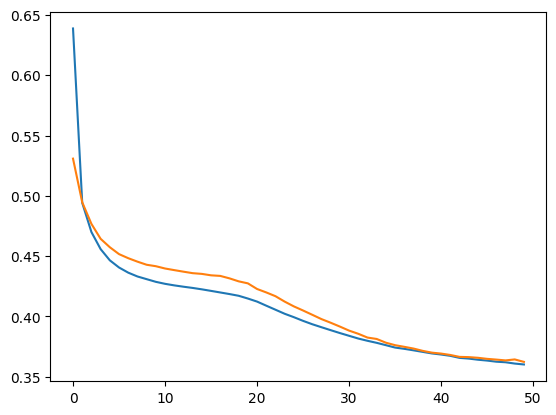

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Both the training loss(in blue) and validation loss are decreasing over time, which shows that the model is learning.

At the later epochs both losses are converging and stabilizing which indicates that the model is likely reaching a point where further training might not result in significant improvements.

The gap between the training and validation loss is small so there isn't significant overfitting in the model.

There os a rapid drop in both losses during the initial epochs, which means that the learning rate is appropriately set, and the model quickly adapts to the patterns in the data.

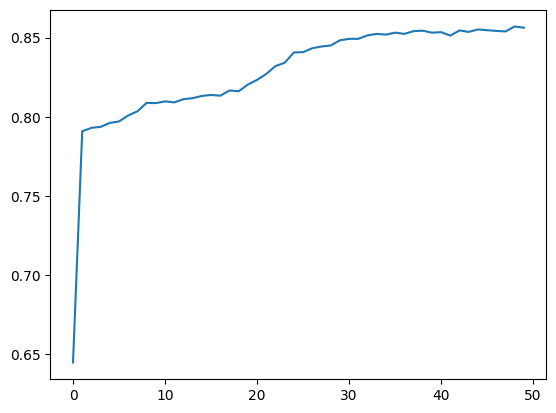

In [70]:
plt.plot(history.history['accuracy'])